In [ ]:
from google.colab import files
uploaded = files.upload("iris.xlsx")

In [ ]:
df = pd.read_excel("/content/data/nama_file.xlsx")
print(df.head())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#

In [ ]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

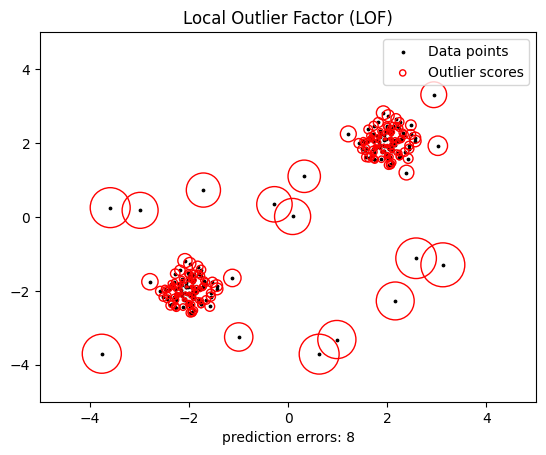

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from sklearn.neighbors import LocalOutlierFactor

# This part generates the data and is crucial for the plot to work
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# This part trains the model and calculates outlier scores
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

# This is the function for customizing the legend
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

# Now we plot the data, using 'X' which is now defined
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = "/mnt/data/iris.xlsx"
df = pd.read_excel('iris')


In [ ]:
# Menampilkan beberapa data pertama
print("Data awal:")
print(df.head())


In [ ]:
# Fungsi untuk mencari outliers menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [ ]:
# Mendeteksi outliers untuk setiap kolom numerik
outliers_dict = {}
for col in df.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(df, col)
    outliers_dict[col] = outliers
    print(f"Outliers pada kolom {col}:")
    print(outliers)

In [ ]:
# Visualisasi boxplot untuk mendeteksi outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Mendeteksi Outliers")
plt.show()